In [1]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(13,7)})
sns.set_style("white")

In [2]:
def find_1(kind_of_list):
    try:
        return 1 + kind_of_list.tolist().index(1)
    except:
        return None

In [3]:
def preprocessing(dataframe,renglon_nuetro):
    
    dataframe = dataframe.replace({'I':0,'D':1})
    dataframe['renglon_de_cambio'] = dataframe.apply(lambda row: find_1(row[1:12]) , axis=1)
    # 0 quiere decir que nunca cambio de la columna izquierda
    dataframe['renglon_de_cambio'] = dataframe['renglon_de_cambio'].fillna(0)
    dataframe['renglon_de_cambio'] = dataframe['renglon_de_cambio'].astype(int)
    sin_equivalente_cierto = dataframe[dataframe['renglon_de_cambio']==0]
    print('participantes sin equivalente cierto:',sin_equivalente_cierto.shape[0])
    dataframe = dataframe[dataframe['renglon_de_cambio']!=0]
    # Hallar suma de elecciones en la derecha
    dataframe['n_derecha'] = dataframe.apply(lambda row: sum(row[1:12]==1) ,axis=1)
    # Comportamientos erraticos, multiple switch, empezar a la derecha
    dataframe['erratico'] = 1*dataframe.apply(lambda row: 12 - row['n_derecha']!=row['renglon_de_cambio'] if row['renglon_de_cambio']!= 0 else False, axis=1)
    
    averso_al_riesgo = lambda x: 'Averso' if x > 3 else 'Propenso' if x < 3 else 'Neutro'
    dataframe['tipo_de_riesgo'] = dataframe['renglon_de_cambio'].apply(averso_al_riesgo)
    return dataframe

In [4]:
# tabla1[tabla1['renglon_de_cambio']==0]

In [5]:
# tabla2[tabla2['renglon_de_cambio']==0]

In [6]:
tabla1 = preprocessing(pd.read_excel('datos taller 4.xlsx',sheet_name='tabla1'), 3)
tabla1.head()

participantes sin equivalente cierto: 12


,iid,Tabla1_fila1,Tabla1_fila2,Tabla1_fila3,Tabla1_fila4,Tabla1_fila5,Tabla1_fila6,Tabla1_fila7,Tabla1_fila8,Tabla1_fila9,Tabla1_fila10,Tabla1_fila11,renglon_de_cambio,n_derecha,erratico,tipo_de_riesgo
0,1,0,0,0,0,0,1,1,1,1,1,1,6,6,0,Averso
1,2,0,0,0,0,1,1,1,1,1,1,1,5,7,0,Averso
2,3,0,0,0,0,0,0,0,0,1,1,1,9,3,0,Averso
3,4,0,0,1,1,1,1,1,1,1,1,1,3,9,0,Neutro
4,5,0,0,0,0,0,0,0,1,1,1,1,8,4,0,Averso


In [7]:
print('numero de participantes con comportamiento errático en la tabla 1:',tabla1[tabla1['erratico']==1].shape[0])

numero de participantes con comportamiento errático en la tabla 1: 0


In [8]:
tabla1['tipo_de_riesgo'].value_counts()

Averso      167
Neutro       24
Propenso     17
Name: tipo_de_riesgo, dtype: int64

In [9]:
tabla1['renglon_de_cambio'].describe()

count    208.000000
mean       6.447115
std        2.767494
min        2.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       11.000000
Name: renglon_de_cambio, dtype: float64

In [10]:
tabla_resumen = tabla1['renglon_de_cambio'].value_counts().to_frame().reset_index().sort_values(by='index')
tabla_resumen.columns = ['Renglón de cambio','Frecuencia']
tabla_resumen['Porcentaje'] = round(100*tabla_resumen['Frecuencia']/tabla_resumen['Frecuencia'].sum(),1)
tabla_resumen

,Renglón de cambio,Frecuencia,Porcentaje
7,2,17,8.2
2,3,24,11.5
4,4,23,11.1
9,5,15,7.2
3,6,23,11.1
1,7,26,12.5
0,8,26,12.5
6,9,19,9.1
8,10,16,7.7
5,11,19,9.1


<AxesSubplot:xlabel='renglon_de_cambio', ylabel='count'>

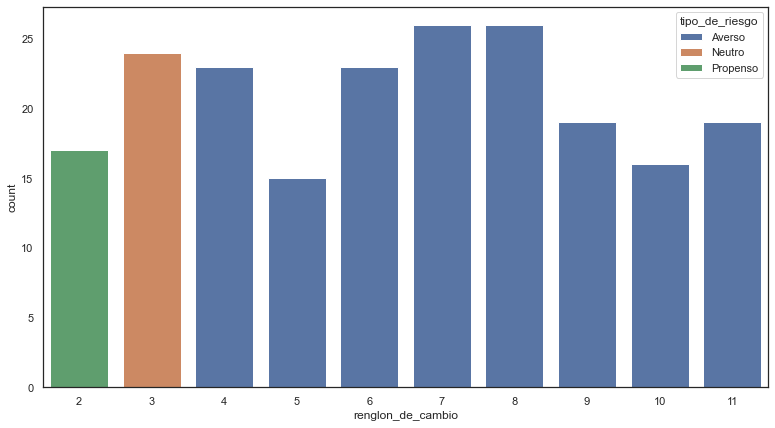

In [11]:
sns.countplot(data=tabla1, x="renglon_de_cambio", hue="tipo_de_riesgo",dodge=False)

In [12]:
tabla2 = preprocessing(pd.read_excel('datos taller 4.xlsx',sheet_name='tabla2'), 3)

participantes sin equivalente cierto: 10


In [13]:
print('numero de participantes con comportamiento errático en la tabla 2:',tabla2[tabla2['erratico']==1].shape[0])
print('idd de pacientes erráticos:',list(tabla2[tabla2['erratico']==1]['iid']))

numero de participantes con comportamiento errático en la tabla 2: 22
idd de pacientes erráticos: [26, 42, 60, 73, 75, 80, 84, 93, 94, 102, 107, 108, 115, 123, 160, 168, 171, 177, 181, 199, 207, 213]


In [14]:
tabla2[tabla2['erratico']==1]

,iid,Tabla2_fila1,Tabla2_fila2,Tabla2_fila3,Tabla2_fila4,Tabla2_fila5,Tabla2_fila6,Tabla2_fila7,Tabla2_fila8,Tabla2_fila9,Tabla2_fila10,Tabla2_fila11,renglon_de_cambio,n_derecha,erratico,tipo_de_riesgo
25,26,1,0,0,0,0,0,0,0,0,0,0,1,1,1,Propenso
41,42,0,1,0,0,0,0,0,0,0,0,0,2,1,1,Propenso
59,60,1,1,0,0,0,0,0,0,0,0,0,1,2,1,Propenso
72,73,0,1,0,0,0,0,0,0,0,0,0,2,1,1,Propenso
74,75,1,1,0,0,0,0,0,0,0,0,0,1,2,1,Propenso
79,80,1,1,1,1,0,0,0,0,0,0,0,1,4,1,Propenso
83,84,1,1,0,0,0,0,0,0,0,0,0,1,2,1,Propenso
92,93,0,0,1,1,1,1,0,0,0,0,0,3,4,1,Neutro
93,94,0,0,0,1,1,0,0,0,0,0,0,4,2,1,Averso
101,102,0,0,1,1,1,1,0,0,0,0,0,3,4,1,Neutro


In [15]:
tabla2_sin_erraticos = tabla2[tabla2['erratico']==0]

In [16]:
tabla2_sin_erraticos['tipo_de_riesgo'].value_counts()

Averso      142
Neutro       26
Propenso     20
Name: tipo_de_riesgo, dtype: int64

In [17]:
tabla2_sin_erraticos['renglon_de_cambio'].describe()

count    188.000000
mean       5.803191
std        2.662593
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       11.000000
Name: renglon_de_cambio, dtype: float64

In [18]:
tabla_resumen = tabla2_sin_erraticos['renglon_de_cambio'].value_counts().to_frame().reset_index().sort_values(by='index')
tabla_resumen.columns = ['Renglón de cambio','Frecuencia']
tabla_resumen['Porcentaje'] = round(100*tabla_resumen['Frecuencia']/tabla_resumen['Frecuencia'].sum(),1)
tabla_resumen

,Renglón de cambio,Frecuencia,Porcentaje
5,2,20,10.6
1,3,26,13.8
0,4,28,14.9
6,5,17,9.0
4,6,21,11.2
3,7,22,11.7
2,8,23,12.2
8,9,11,5.9
9,10,7,3.7
7,11,13,6.9


<AxesSubplot:xlabel='renglon_de_cambio', ylabel='count'>

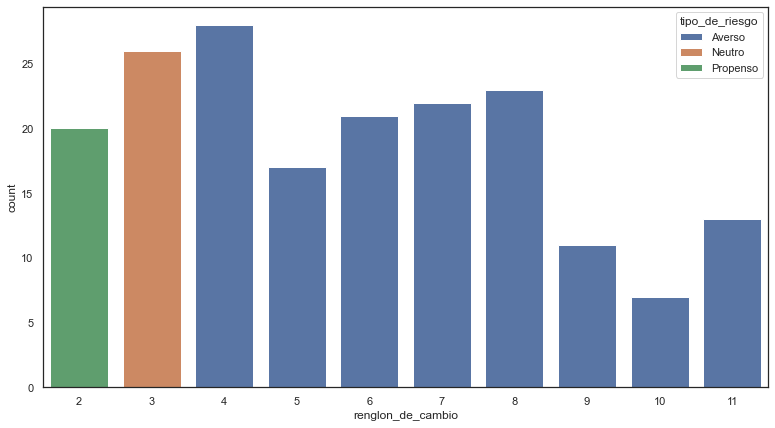

In [19]:
sns.countplot(data=tabla2_sin_erraticos, x="renglon_de_cambio", hue="tipo_de_riesgo",dodge=False)

<ipython-input-20-7488e6e57260>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla2_sin_erraticos['pago'] = tabla2_sin_erraticos['renglon_de_cambio'].replace(renglon,pago_izquierda)


<AxesSubplot:xlabel='pago', ylabel='count'>

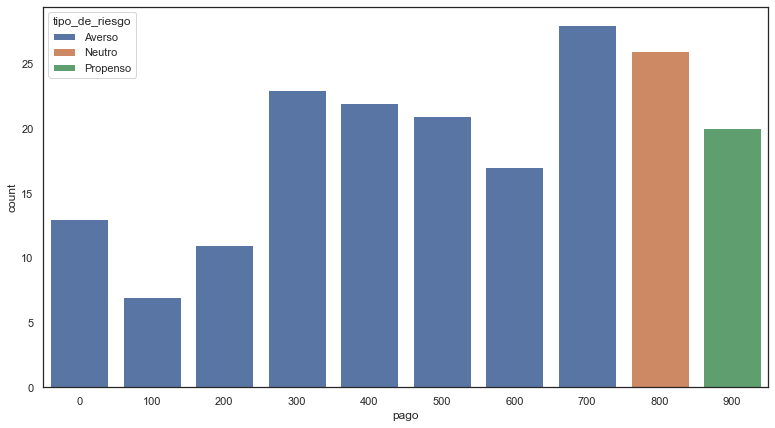

In [20]:
pago_izquierda = list(range(0, 1100, 100))[::-1]
renglon = list(range(1, 12, 1))

tabla2_sin_erraticos['pago'] = tabla2_sin_erraticos['renglon_de_cambio'].replace(renglon,pago_izquierda)
sns.countplot(data=tabla2_sin_erraticos, x="pago", hue="tipo_de_riesgo",dodge=False)

<ipython-input-21-bf4f7c32ea01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla2_sin_erraticos['pago_menos_certero_equivalente'] = tabla2_sin_erraticos['pago'] - 800


<AxesSubplot:xlabel='pago_menos_certero_equivalente', ylabel='count'>

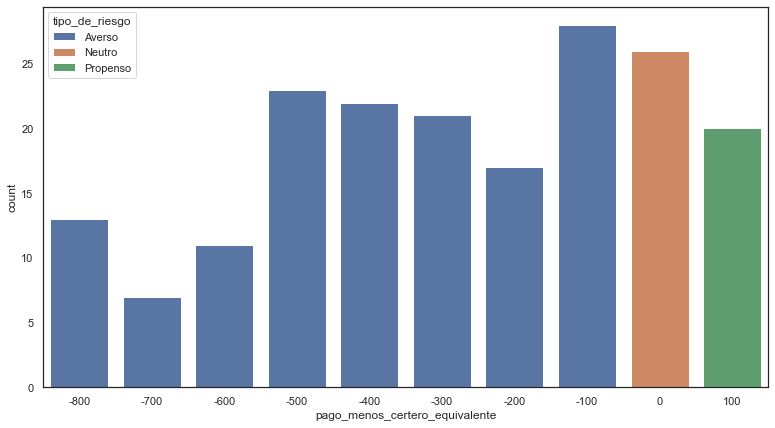

In [21]:
tabla2_sin_erraticos['pago_menos_certero_equivalente'] = tabla2_sin_erraticos['pago'] - 800
sns.countplot(data=tabla2_sin_erraticos, x="pago_menos_certero_equivalente", hue="tipo_de_riesgo",dodge=False)

In [22]:
tabla_2_ = tabla2_sin_erraticos[['iid','renglon_de_cambio']]
tabla_1_ = tabla1[['iid','renglon_de_cambio']]
tabla_1_['tabla'] = 'Tabla 1'
tabla_2_['tabla'] = 'Tabla 2'

tablas_completas = tabla_1_.append(tabla_2_)

tabla_1_ = tabla_1_[['iid','renglon_de_cambio']]
tabla_2_ = tabla_2_[['iid','renglon_de_cambio']]

tabla_1_.columns = ['iid','renglon_de_cambio_tabla1']
tabla_2_.columns = ['iid','renglon_de_cambio_tabla2']

renglones_de_cambio = pd.merge(tabla_2_,tabla_1_, on='iid',how='left')
axioma_independencia = lambda x: 1 if x['renglon_de_cambio_tabla1']==x['renglon_de_cambio_tabla2'] else 0
renglones_de_cambio['axioma_independencia'] = renglones_de_cambio.apply(axioma_independencia,axis=1)

axioma = renglones_de_cambio[['iid','axioma_independencia']]
tablas_completas = pd.merge(tablas_completas,axioma, on='iid',how='left')
print('participantes que cumplen con axioma de independencia:',renglones_de_cambio['axioma_independencia'].sum())


participantes que cumplen con axioma de independencia: 115


<ipython-input-22-97e4eafd23bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_1_['tabla'] = 'Tabla 1'
<ipython-input-22-97e4eafd23bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_2_['tabla'] = 'Tabla 2'


<AxesSubplot:xlabel='tabla', ylabel='renglon_de_cambio'>

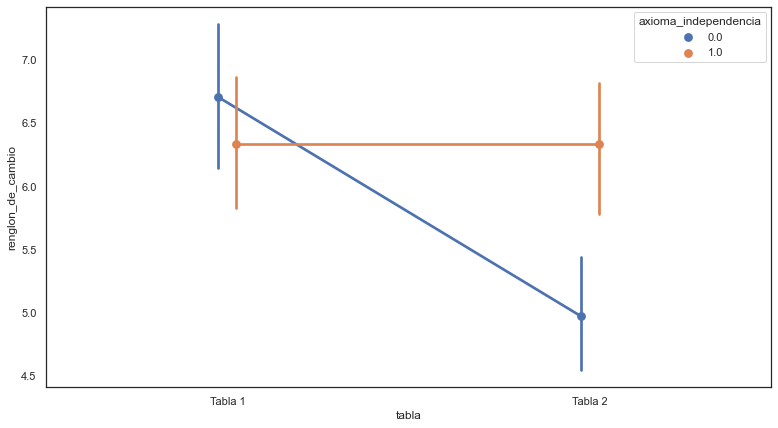

In [23]:
sns.pointplot(x="tabla", y="renglon_de_cambio", hue="axioma_independencia",data=tablas_completas,
              dodge=True, )